Epoch 0, Loss: 0.156590
Epoch 500, Loss: 0.152234
Epoch 1000, Loss: 0.136699
Epoch 1500, Loss: 0.072081
Epoch 2000, Loss: 0.029125
Epoch 2500, Loss: 0.026302
Epoch 3000, Loss: 0.026192
Epoch 3500, Loss: 0.026177
Epoch 4000, Loss: 0.026163
Epoch 4500, Loss: 0.026147


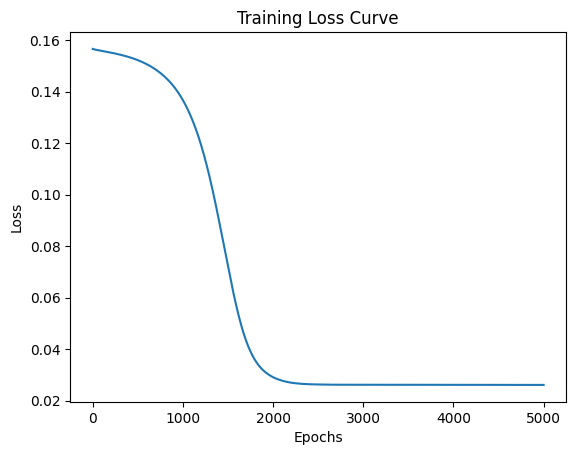

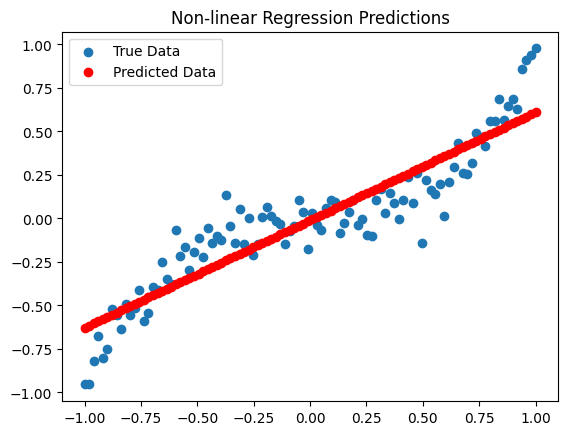

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
X = np.linspace(-1, 1, 100).reshape(-1, 1)
y = X**3 + 0.1 * np.random.randn(*X.shape)


def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)


input_size = 1
hidden_size1 = 10
hidden_size2 = 10
output_size = 1

np.random.seed(42)
W1 = np.random.randn(input_size, hidden_size1) * 0.1
b1 = np.zeros((1, hidden_size1))
W2 = np.random.randn(hidden_size1, hidden_size2) * 0.1
b2 = np.zeros((1, hidden_size2))
W3 = np.random.randn(hidden_size2, output_size) * 0.1
b3 = np.zeros((1, output_size))


learning_rate = 0.01
epochs = 5000
losses = []


for epoch in range(epochs):

    Z1 = X @ W1 + b1
    A1 = relu(Z1)
    Z2 = A1 @ W2 + b2
    A2 = relu(Z2)
    Z3 = A2 @ W3 + b3
    A3 = Z3

    loss = np.mean((A3 - y) ** 2)
    losses.append(loss)

    dA3 = 2 * (A3 - y) / y.shape[0]
    dZ3 = dA3
    dW3 = A2.T @ dZ3
    db3 = np.sum(dZ3, axis=0, keepdims=True)

    dA2 = dZ3 @ W3.T
    dZ2 = dA2 * relu_derivative(A2)
    dW2 = A1.T @ dZ2
    db2 = np.sum(dZ2, axis=0, keepdims=True)

    dA1 = dZ2 @ W2.T
    dZ1 = dA1 * relu_derivative(A1)
    dW1 = X.T @ dZ1
    db1 = np.sum(dZ1, axis=0, keepdims=True)
    W3 -= learning_rate * dW3
    b3 -= learning_rate * db3
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1

    if epoch % 500 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.6f}")

plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.show()

# Predictions
preds = A3
plt.scatter(X, y, label='True Data')
plt.scatter(X, preds, label='Predicted Data', color='red')
plt.legend()
plt.title('Non-linear Regression Predictions')
plt.show()
